In [1]:
import pandas as pd

In [2]:
GS_data_set = {}
CS_data_set = {}

for year in range(2013,2026):
    GS_data_set[year] = pd.read_parquet(f"C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate/GS_cleaned/GS_data_cleaned_{year}.parquet")
    print(year," GS ",len(GS_data_set[year]))
for year in range(2015,2026):
    CS_data_set[year] = pd.read_parquet(f"C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate/CS_cleaned/CS_data_cleaned_{year}.parquet")
    print(year," CS ",len(CS_data_set[year]))

2013  GS  98458
2014  GS  102642
2015  GS  117307
2016  GS  118338
2017  GS  118193
2018  GS  104177
2019  GS  109464
2020  GS  113399
2021  GS  116279
2022  GS  105157
2023  GS  112000
2024  GS  113219
2025  GS  114421
2015  CS  1829
2016  CS  1870
2017  CS  4220
2018  CS  33175
2019  CS  56250
2020  CS  72149
2021  CS  93798
2022  CS  96181
2023  CS  118293
2024  CS  182254
2025  CS  265110


In [6]:
GS_data_set[2021]

,id,name,address,wgs84_x,wgs84_y,tel,pname,cityname,adname,大类,中类,小类,pname_EN,cityname_EN,corporation,paused
0,B0FFMFRNQG,桃花加油站,艾亭镇,115.187094,32.686149,[],安徽省,阜阳市,临泉县,汽车服务,加油站,加油站,Anhui Province,Fuyang City,Other,0
1,B0G12LMJJD,天杰能源加油站(中国.安徽),京广线庙岔中心幼儿园西北侧约300米,114.907860,32.991422,[],安徽省,阜阳市,临泉县,汽车服务,加油站,加油站,Anhui Province,Fuyang City,Other,0
2,B0G2GXOYJB,鲖西加油站,关庙镇鮦西加油站,114.947640,33.085163,0558-6560058,安徽省,阜阳市,临泉县,汽车服务,加油站,加油站,Anhui Province,Fuyang City,Other,0
3,B0H1M7XFAM,中国助威网加油站,G345关庙镇外围学校西南侧约120米,114.920104,33.093633,[],安徽省,阜阳市,临泉县,汽车服务,加油站,加油站,Anhui Province,Fuyang City,Other,0
4,B0GKZLBDDN,田丰加油站(田丰站),[],114.918860,33.094554,[],安徽省,阜阳市,临泉县,汽车服务,加油站,加油站,Anhui Province,Fuyang City,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116274,B0IDX5WTHS,石家加油站,石垫路,108.343059,30.266408,023-81507789,重庆市,重庆市,石柱土家族自治县,汽车服务,加油站,加油站,Chongqing City,Chongqing City,Other,0
116275,B0IDCCBGEP,罗田加油站,罗田镇天生社会二组300号,108.564222,30.520344,[],重庆市,重庆市,万州区,汽车服务,加油站,加油站,Chongqing City,Chongqing City,Other,0
116276,B00179ARLL,中国石化加油站(一碗水站),348国道与诗城中路交叉口东南380米,109.519775,31.054454,023-56594738,重庆市,重庆市,奉节县,汽车服务,加油站,中国石化,Chongqing City,Chongqing City,CPCC,0
116277,B0IU1GWBFM,林家沟加油站,301省道与105省道交叉口东北40米,109.863039,31.004421,[],重庆市,重庆市,巫山县,汽车服务,加油站,加油站,Chongqing City,Chongqing City,Other,0


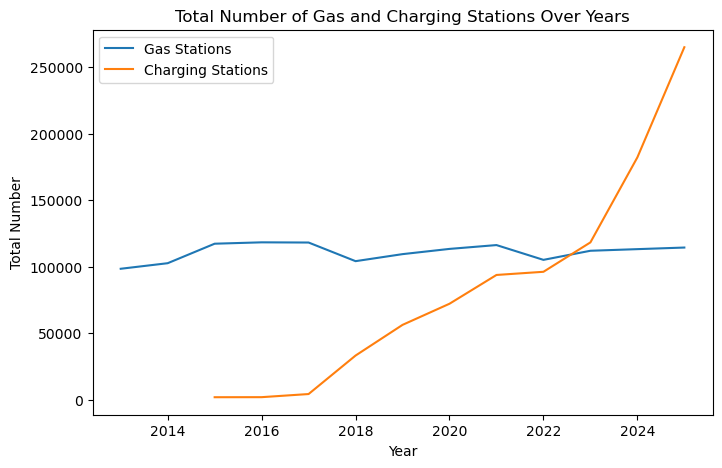

In [3]:
import matplotlib.pyplot as plt

# 1. Plot total number changes for GS and CS
years_gs = sorted(GS_data_set.keys())
years_cs = sorted(CS_data_set.keys())
total_gs = [len(GS_data_set[y]) for y in years_gs]
total_cs = [len(CS_data_set[y]) for y in years_cs]

plt.figure(figsize=(8,5))
plt.plot(years_gs, total_gs, label='Gas Stations')
plt.plot(years_cs, total_cs, label='Charging Stations')
plt.xlabel('Year')
plt.ylabel('Total Number')
plt.title('Total Number of Gas and Charging Stations Over Years')
plt.legend()
plt.show()


In [7]:
# 2. Province and city level GS growth analysis
# Collect GS data by province and city for each year
province_year_count = {}
city_year_count = {}

for year, df in GS_data_set.items():
    # Assume columns 'pname' for province, 'cityname' for city
    province_count = df['pname_EN'].value_counts()
    city_count = df['cityname_EN'].value_counts()
    for pname, cnt in province_count.items():
        province_year_count.setdefault(pname, {})[year] = cnt
    for cname, cnt in city_count.items():
        city_year_count.setdefault(cname, {})[year] = cnt

# Calculate growth ratio for provinces and cities
def growth_ratio(count_dict, start_year, end_year):
    ratios = {}
    for name, year_cnt in count_dict.items():
        if start_year in year_cnt and end_year in year_cnt and year_cnt[start_year] > 0:
            ratio = (year_cnt[end_year] - year_cnt[start_year]) / year_cnt[start_year]
            ratios[name] = ratio
    return ratios

province_growth = growth_ratio(province_year_count, 2013, 2025)
city_growth = growth_ratio(city_year_count, 2013, 2025)

# Top 10 fastest growing provinces and cities
top_provinces = sorted(province_growth.items(), key=lambda x: x[1], reverse=True)[:10]
top_cities = sorted(city_growth.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 fastest growing provinces (GS):")
for pname, ratio in top_provinces:
    print(f"{pname}: {ratio:.2f}")

print("\nTop 10 fastest growing cities (GS):")
for cname, ratio in top_cities:
    print(f"{cname}: {ratio:.2f}")

# Find provinces/cities with largest decline from historical max
def decline_ratio(count_dict):
    declines = {}
    for name, year_cnt in count_dict.items():
        max_val = max(year_cnt.values())
        max_year = max(year_cnt, key=lambda y: year_cnt[y])
        last_val = year_cnt.get(sorted(year_cnt.keys())[-1], 0)
        if max_val > 0:
            ratio = (last_val - max_val) / max_val
            declines[name] = ratio
    return declines

province_decline = decline_ratio(province_year_count)
city_decline = decline_ratio(city_year_count)

# Top 10 declining provinces and cities
decline_provinces = sorted(province_decline.items(), key=lambda x: x[1])[:10]
decline_cities = sorted(city_decline.items(), key=lambda x: x[1])[:10]

print("\nTop 10 declining provinces (GS):")
for pname, ratio in decline_provinces:
    print(f"{pname}: {ratio:.2f}")

print("\nTop 10 declining cities (GS):")
for cname, ratio in decline_cities:
    print(f"{cname}: {ratio:.2f}")


Top 10 fastest growing provinces (GS):
Guizhou Province: 1.97
Tibet Autonomous Region: 1.44
Gansu Province: 0.96
Xinjiang Uygur Autonomous Region: 0.74
Hunan Province: 0.53
Guangxi Zhuang Autonomous Region: 0.46
Qinghai Province: 0.42
hubei province: 0.40
Chongqing City: 0.36
Yunnan Province: 0.34

Top 10 fastest growing cities (GS):
Tiemenguan City: 25.00
Qamdo City: 7.78
Linzhi City: 6.67
Bijie City: 6.26
Qiandongnan Miao and Dong Autonomous Prefecture: 4.34
Alar city: 4.10
Qiannan Buyi and Miao Autonomous Prefecture: 3.39
Nagqu City: 3.00
Tongren City: 2.91
Qianxinan Buyi and Miao Autonomous Prefecture: 2.36

Top 10 declining provinces (GS):
Beijing: -0.31
Henan Province: -0.28
Shanghai: -0.26
Shandong Province: -0.20
Hebei Province: -0.17
Hainan Province: -0.17
Tianjin City: -0.15
Jiangsu Province: -0.15
Ningxia Hui Autonomous Region: -0.12
Anhui Province: -0.12

Top 10 declining cities (GS):
kaifeng city: -0.61
Sanya City: -0.53
Huaibei City: -0.47
Wujiaqu City: -0.35
Puyang City:

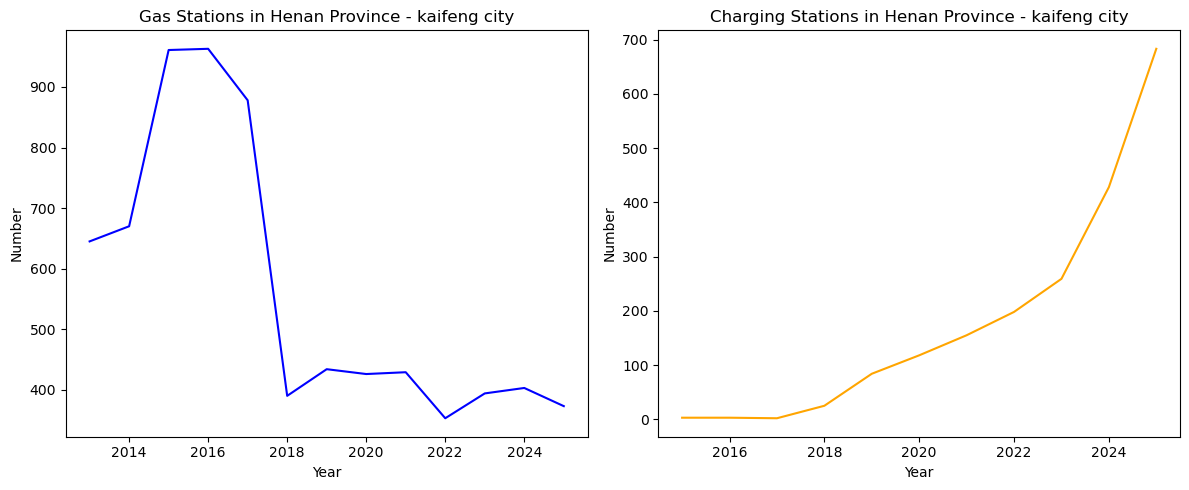

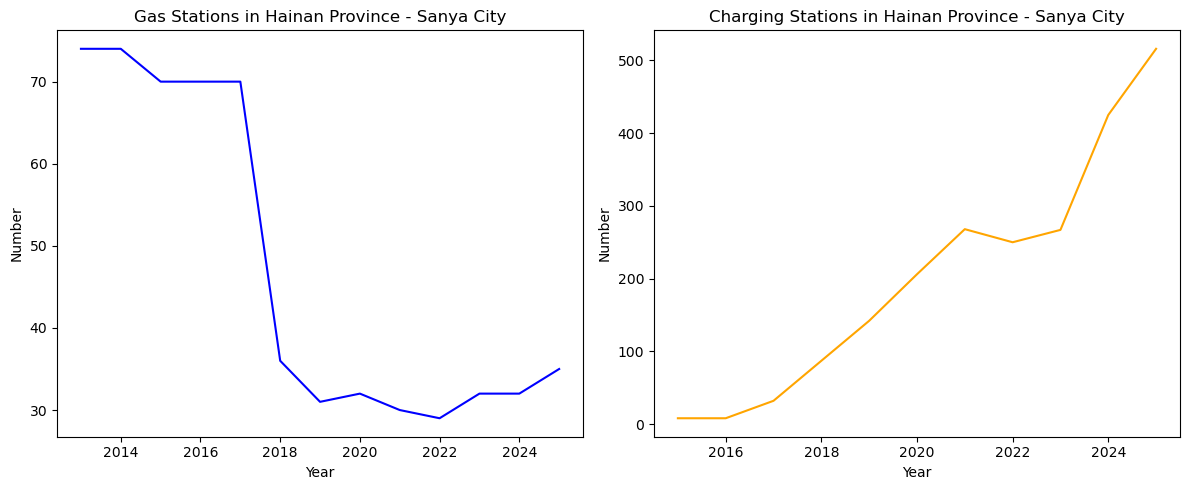

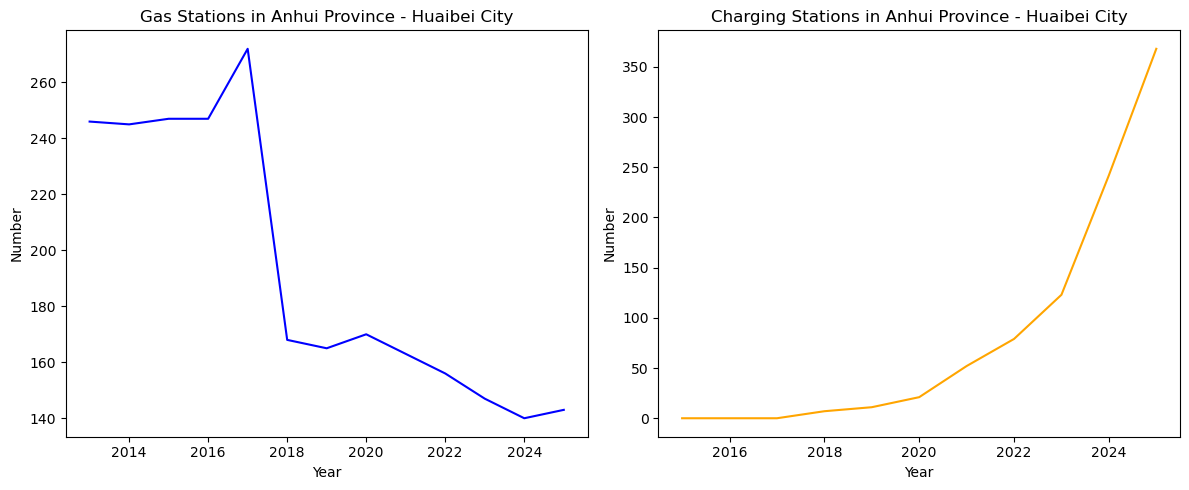

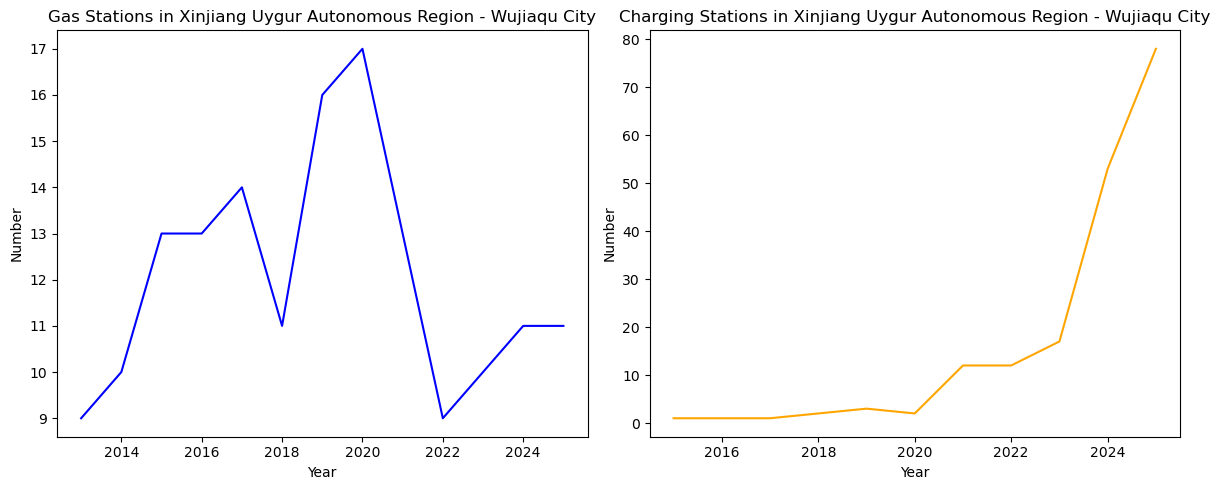

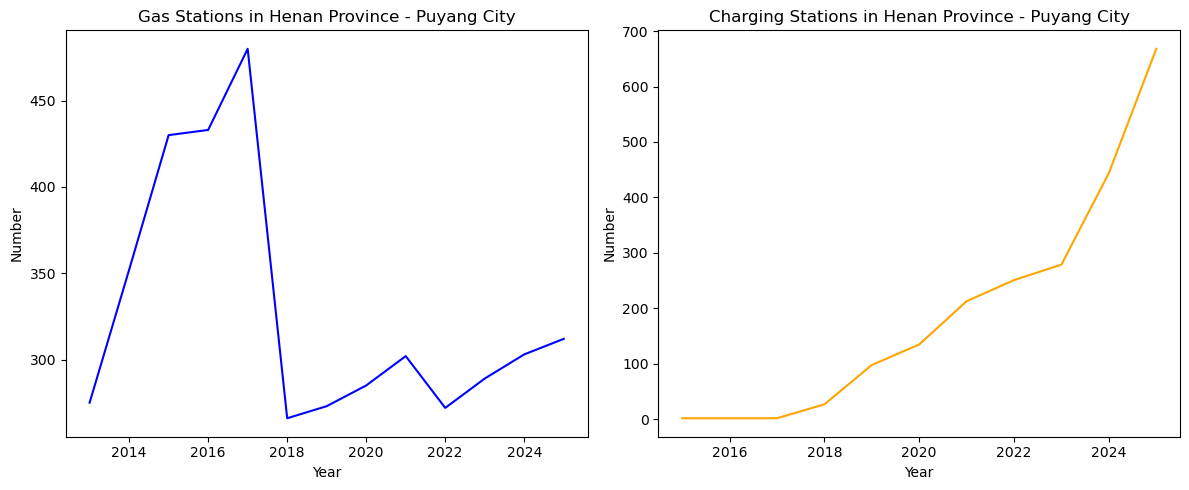

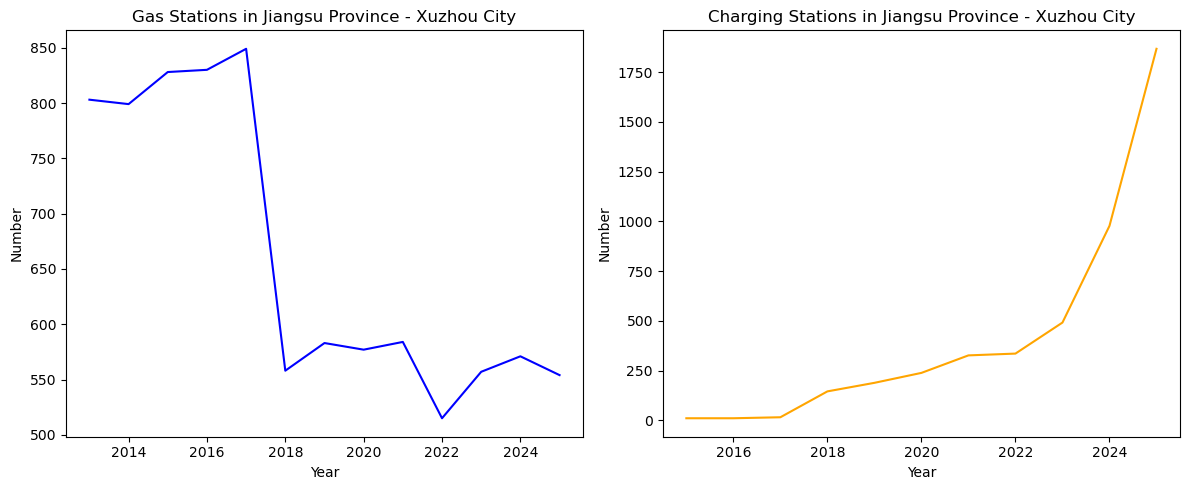

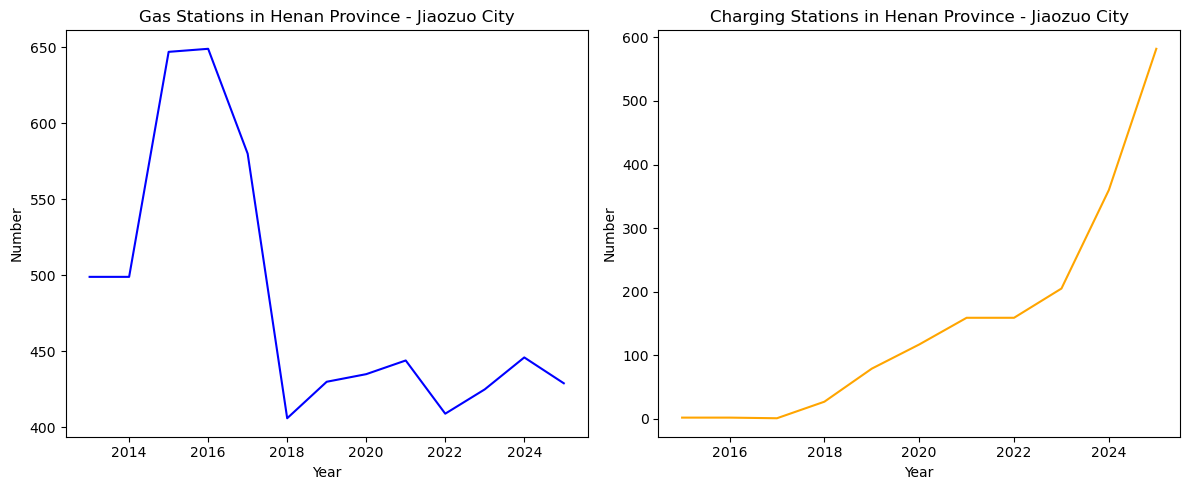

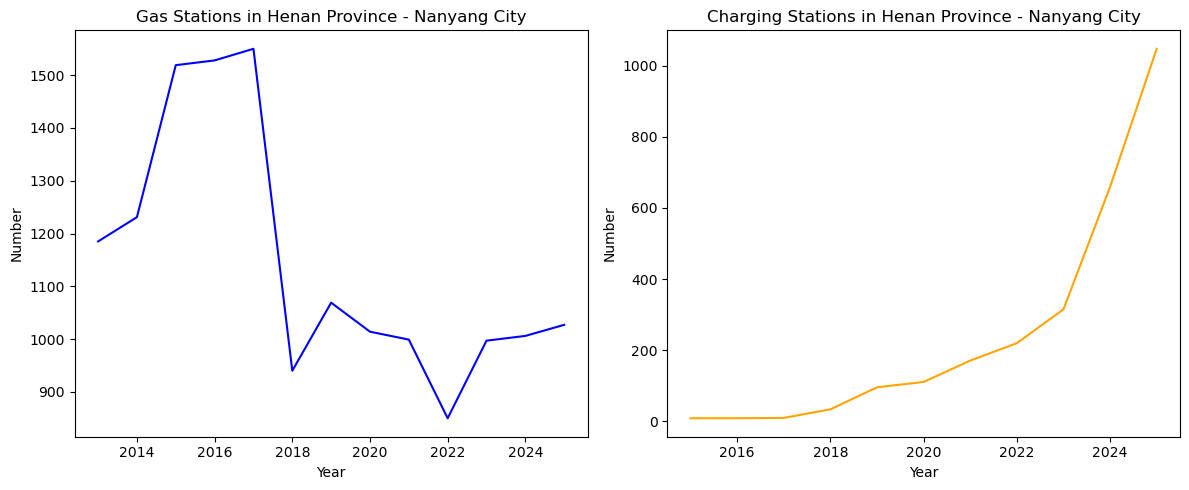

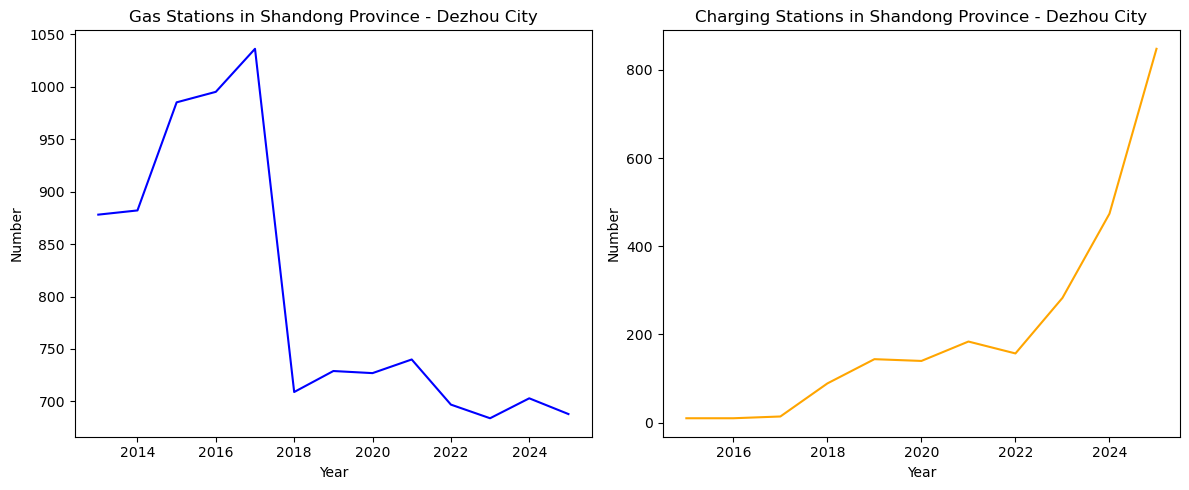

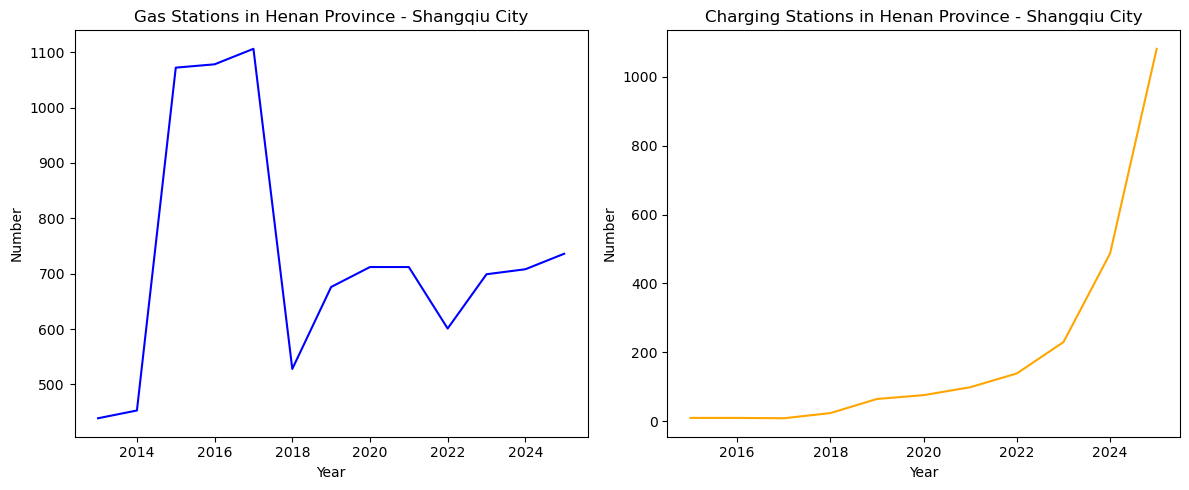

In [10]:
# 3. For declining cities, plot GS and CS number changes with province in title
for cname, _ in decline_cities:
    # Find province name for this city in the latest GS dataset
    latest_year = years_gs[-1]
    df_latest = GS_data_set[latest_year]
    province = df_latest.loc[df_latest['cityname_EN'] == cname, 'pname_EN'].iloc[0] if not df_latest.loc[df_latest['cityname_EN'] == cname, 'pname_EN'].empty else 'Unknown'
    gs_counts = [city_year_count[cname].get(y, 0) for y in years_gs]
    cs_counts = []
    for y in years_cs:
        df_cs = CS_data_set[y]
        cs_counts.append((df_cs['cityname_EN'] == cname).sum())
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(years_gs, gs_counts, color='blue')
    axes[0].set_title(f'Gas Stations in {province} - {cname}')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number')
    axes[1].plot(years_cs, cs_counts, color='orange')
    axes[1].set_title(f'Charging Stations in {province} - {cname}')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Number')
    plt.tight_layout()
    plt.show()


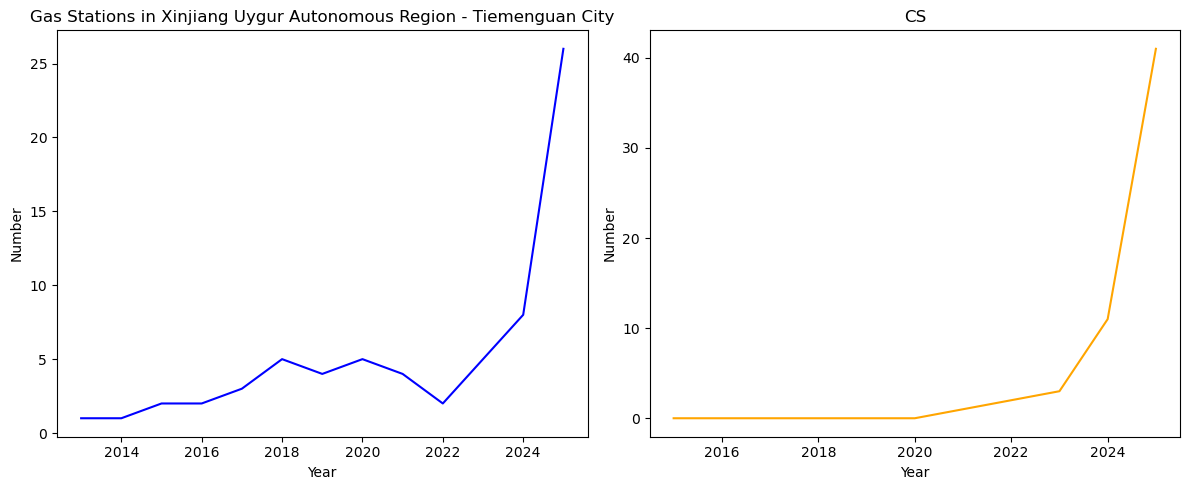

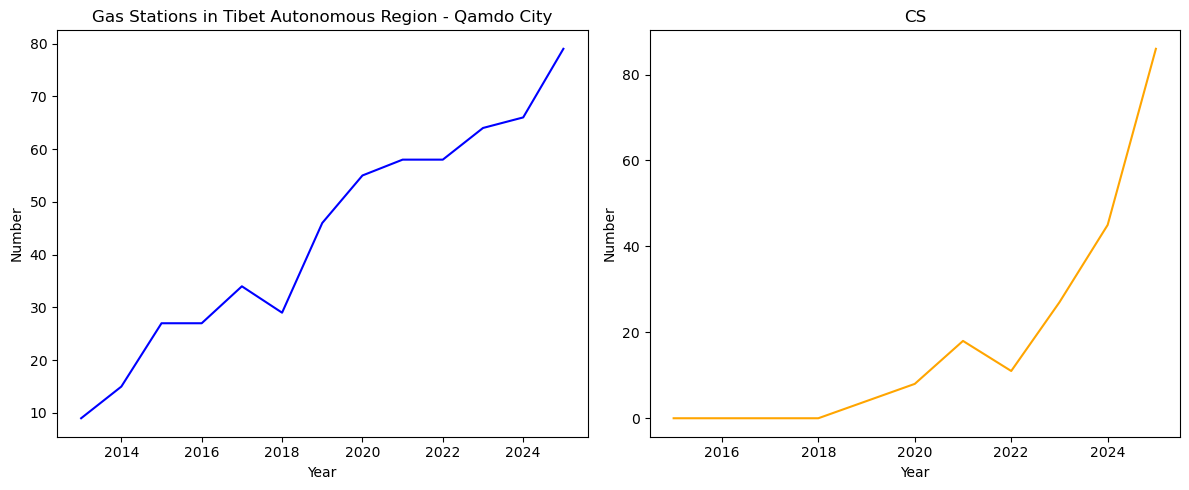

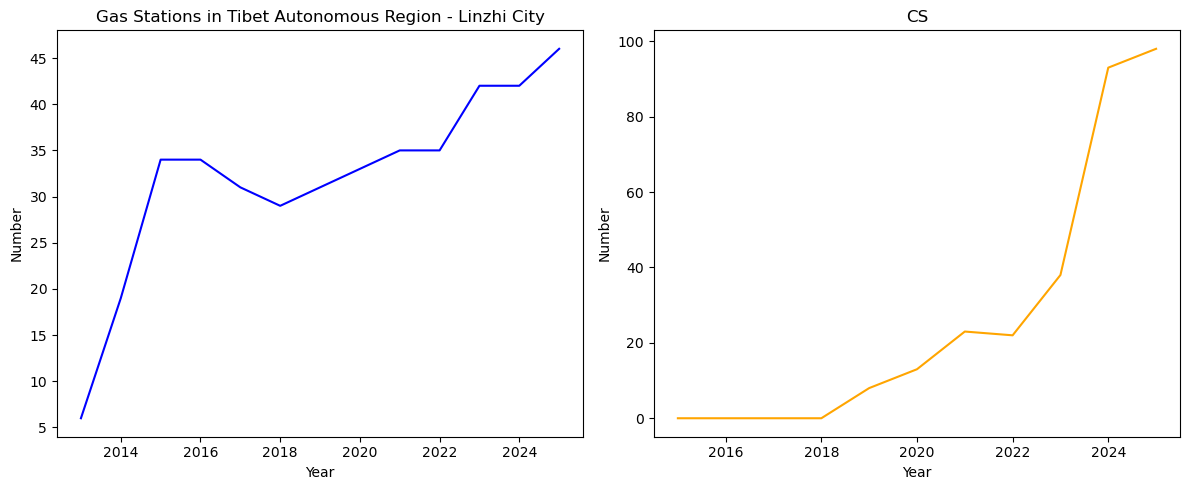

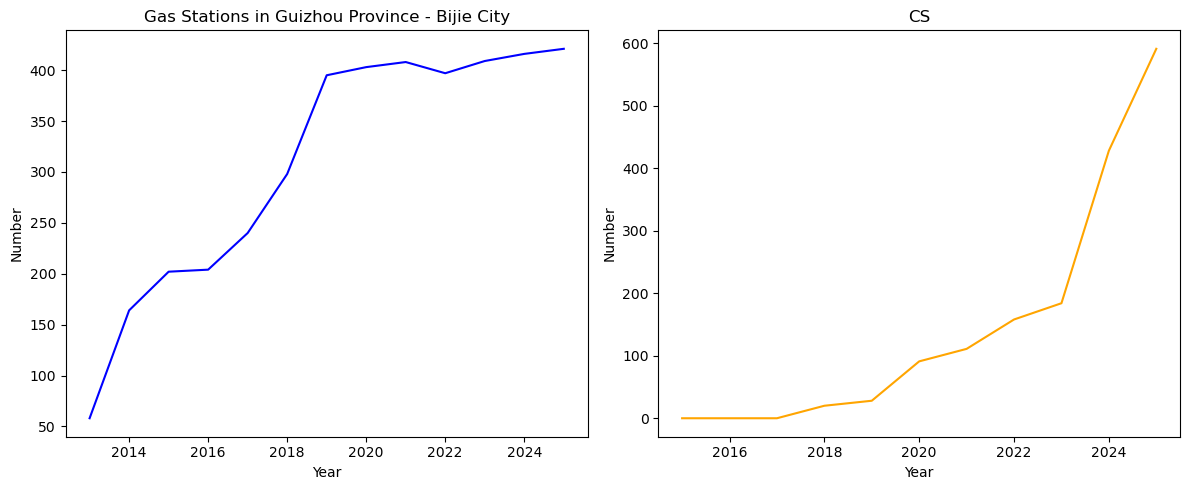

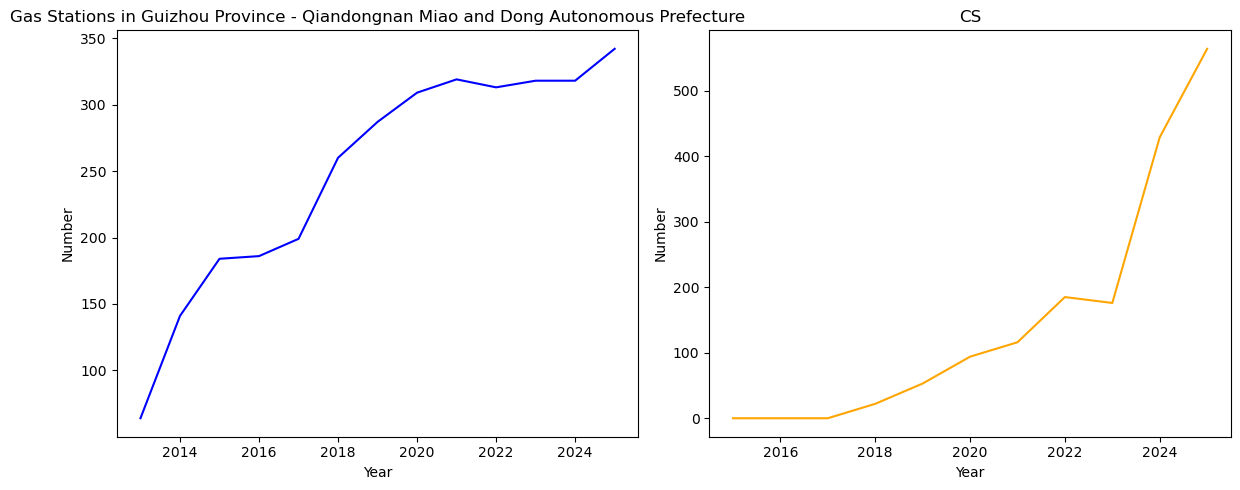

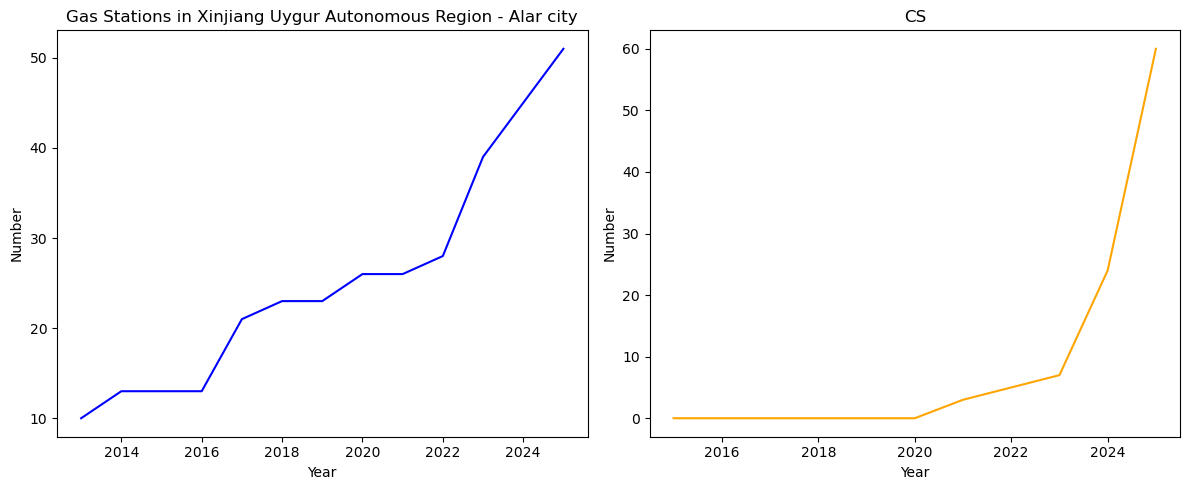

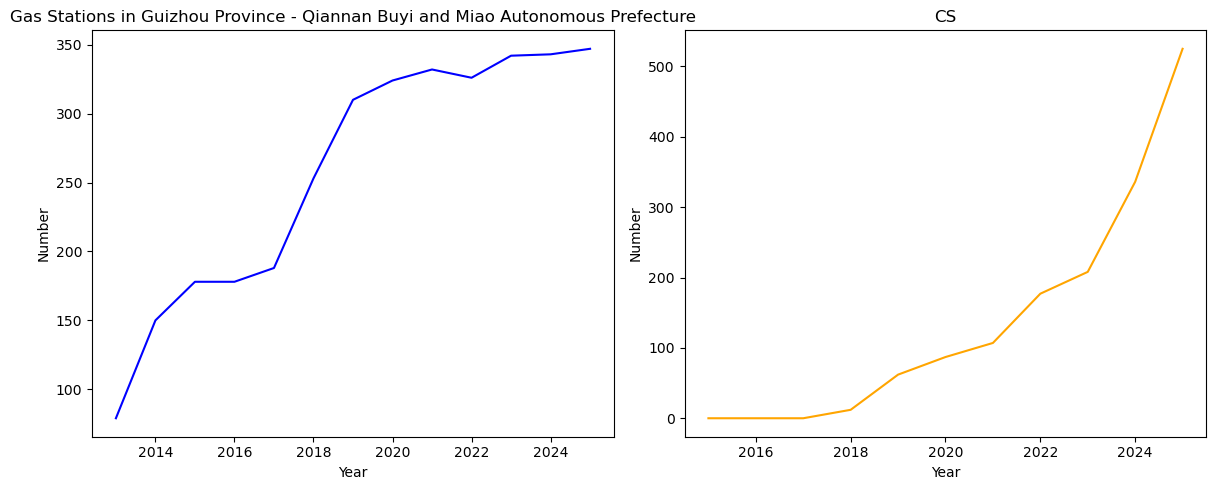

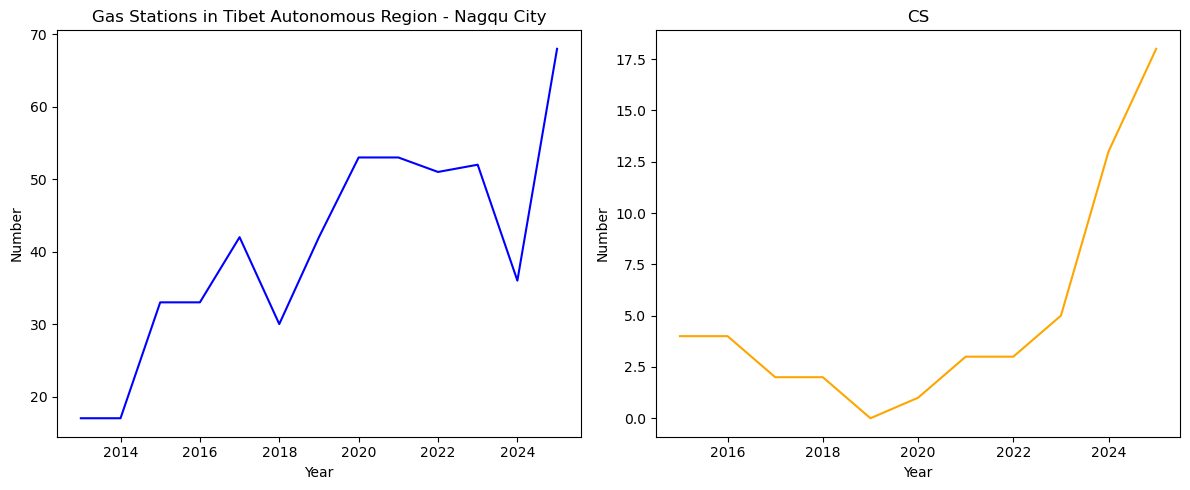

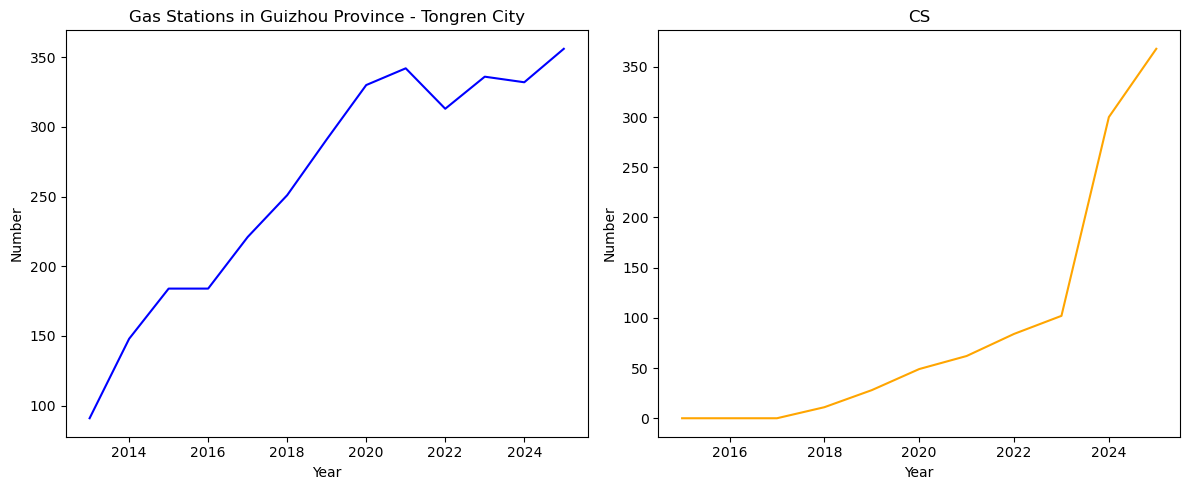

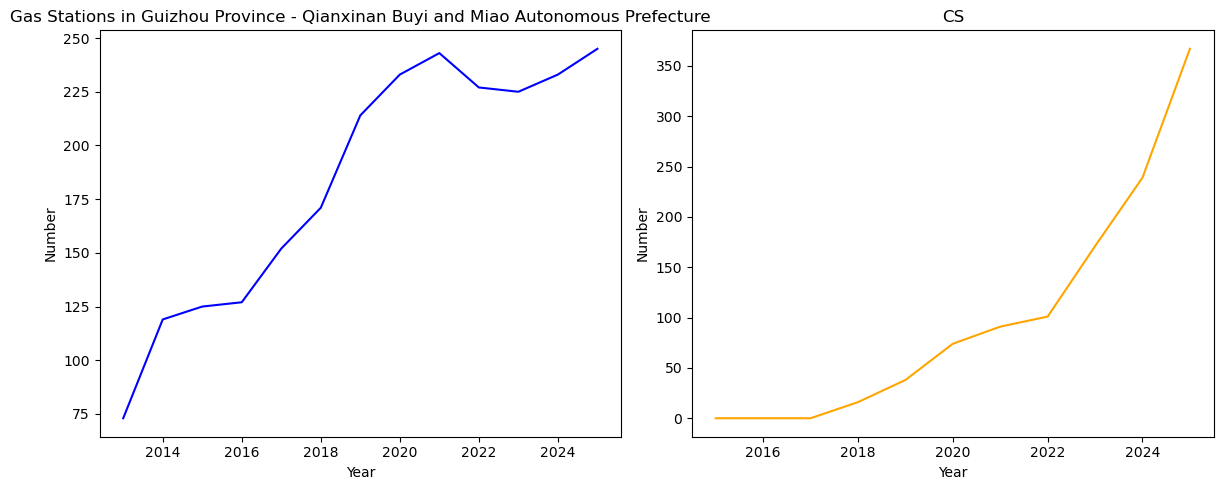

In [12]:
# 3. For declining cities, plot GS and CS number changes with province in title
for cname, _ in top_cities:
    # Find province name for this city in the latest GS dataset
    latest_year = years_gs[-1]
    df_latest = GS_data_set[latest_year]
    province = df_latest.loc[df_latest['cityname_EN'] == cname, 'pname_EN'].iloc[0] if not df_latest.loc[df_latest['cityname_EN'] == cname, 'pname_EN'].empty else 'Unknown'
    gs_counts = [city_year_count[cname].get(y, 0) for y in years_gs]
    cs_counts = []
    for y in years_cs:
        df_cs = CS_data_set[y]
        cs_counts.append((df_cs['cityname_EN'] == cname).sum())
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(years_gs, gs_counts, color='blue')
    axes[0].set_title(f'Gas Stations in {province} - {cname}')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number')
    axes[1].plot(years_cs, cs_counts, color='orange')
    axes[1].set_title(f'CS')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Number')
    plt.tight_layout()
    plt.show()

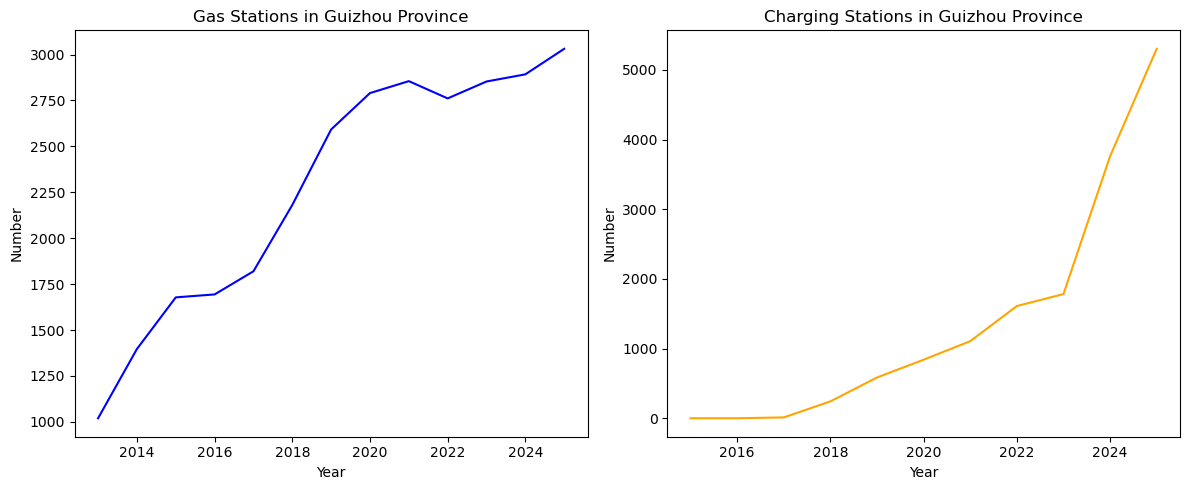

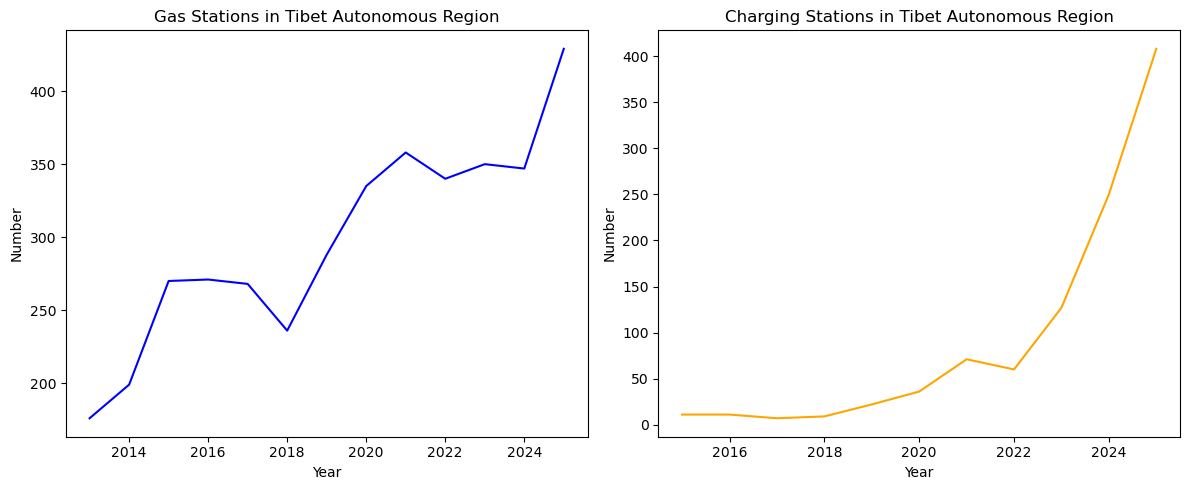

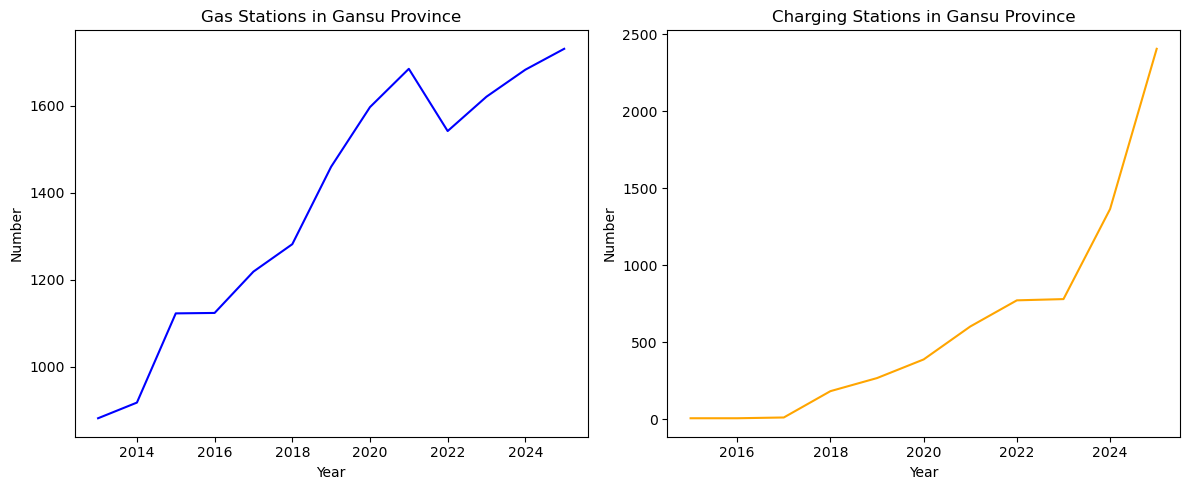

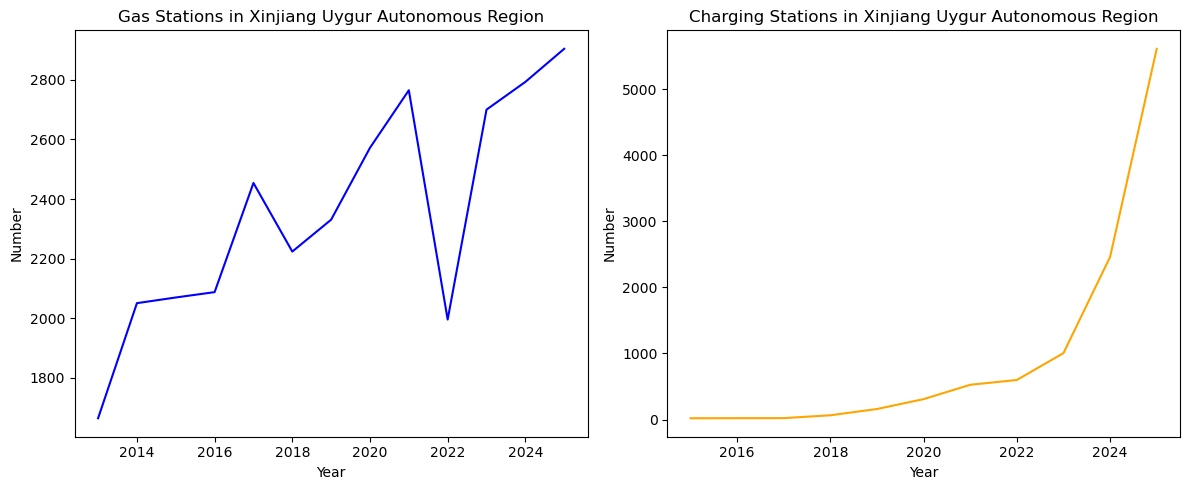

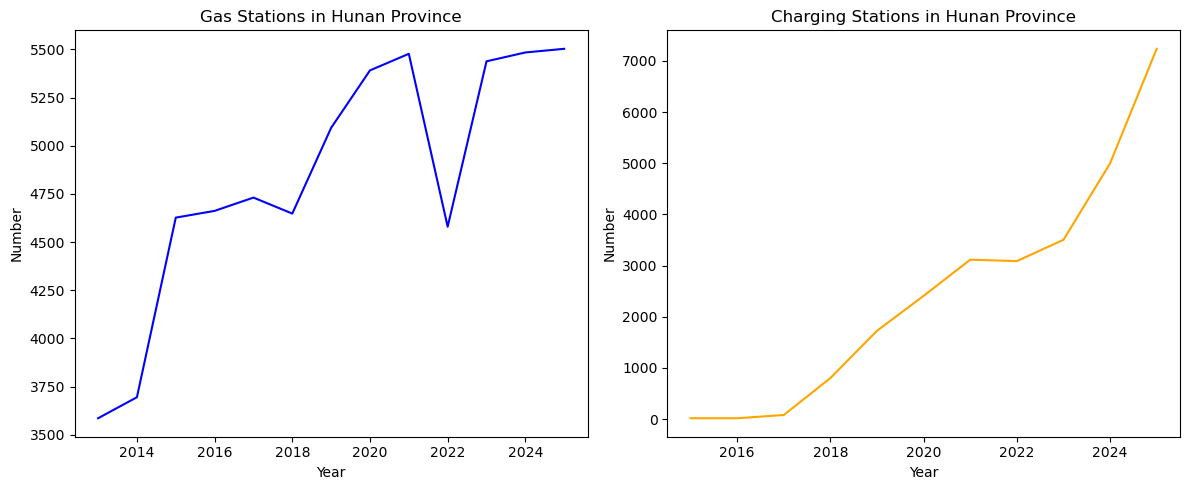

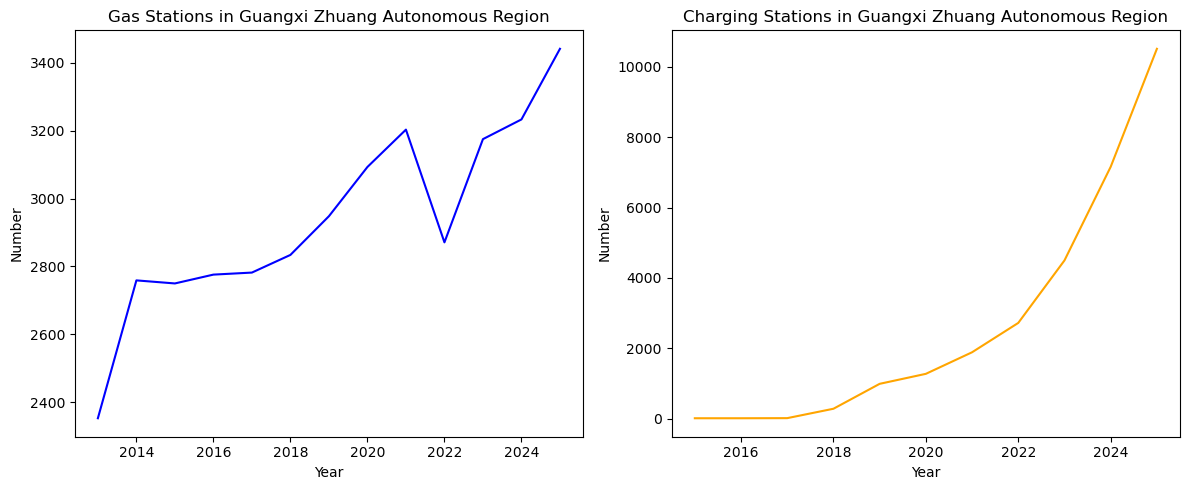

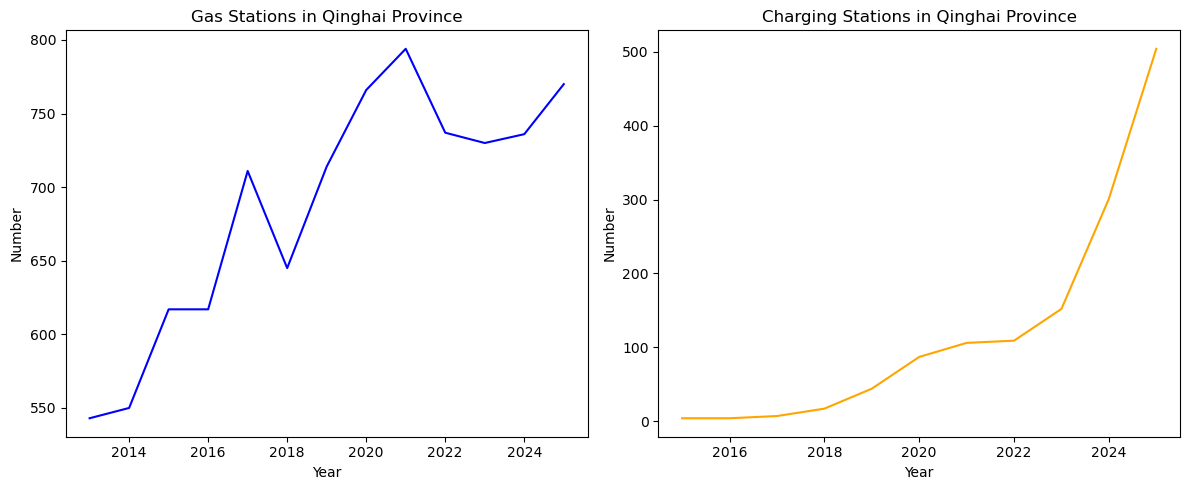

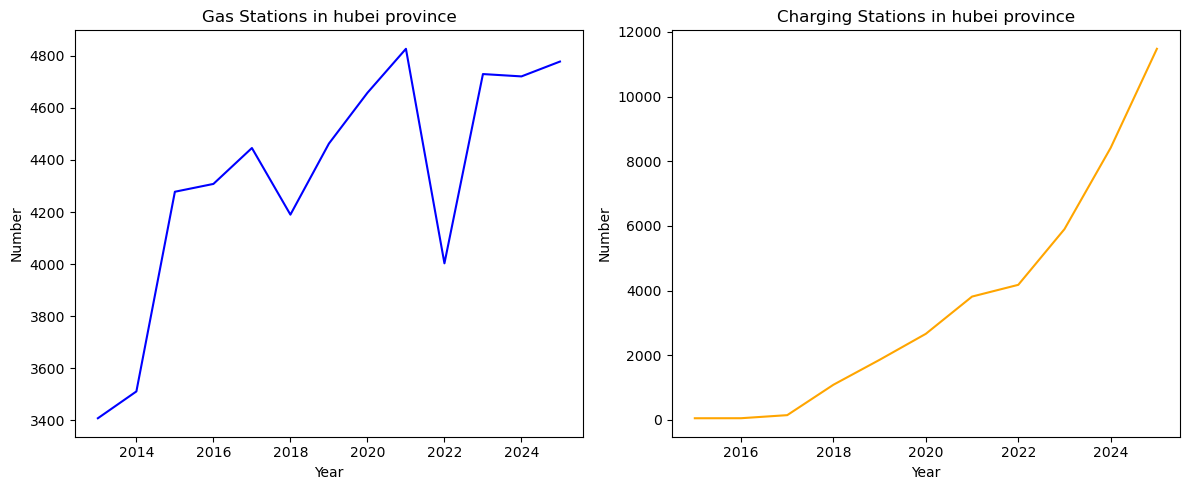

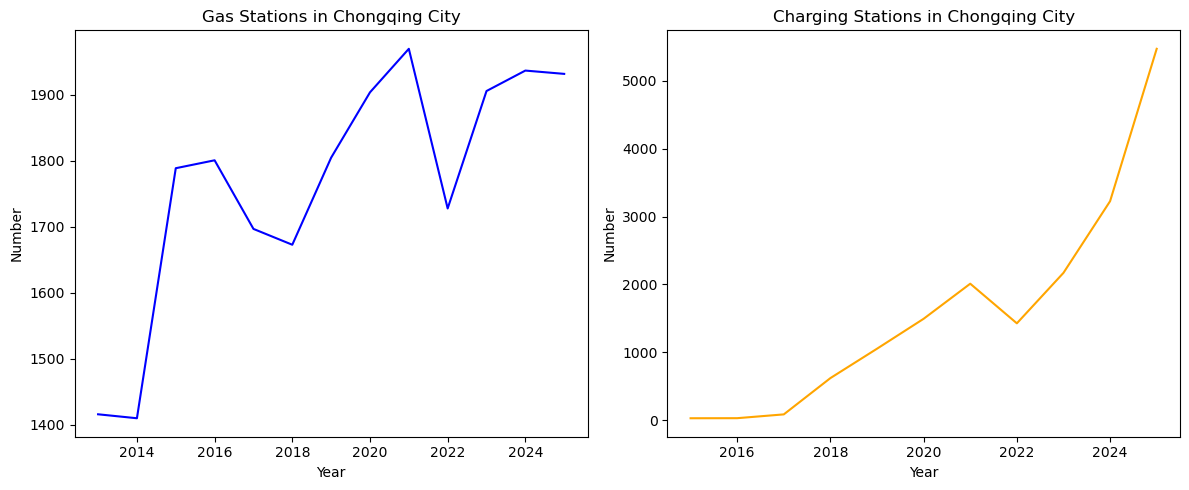

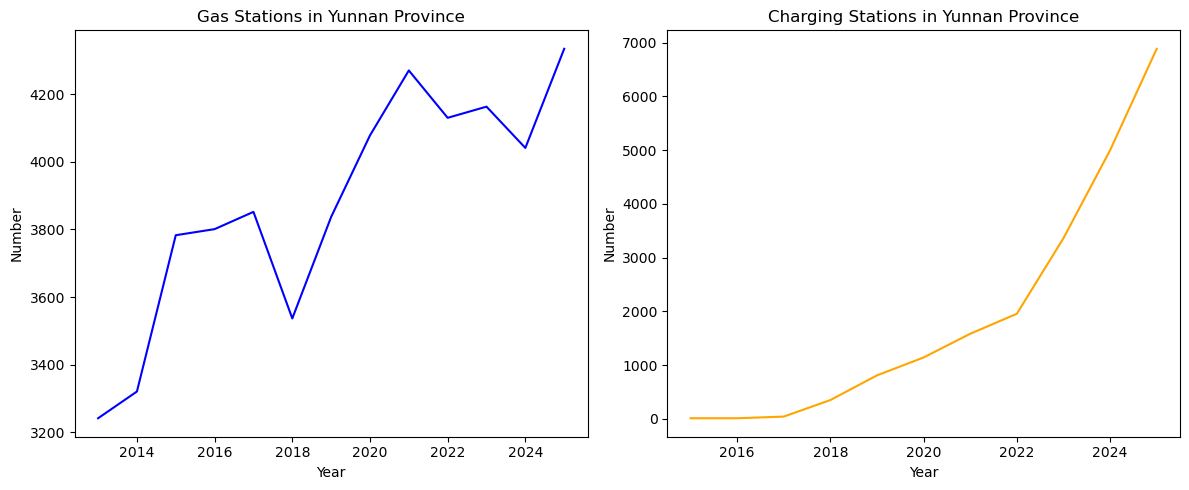

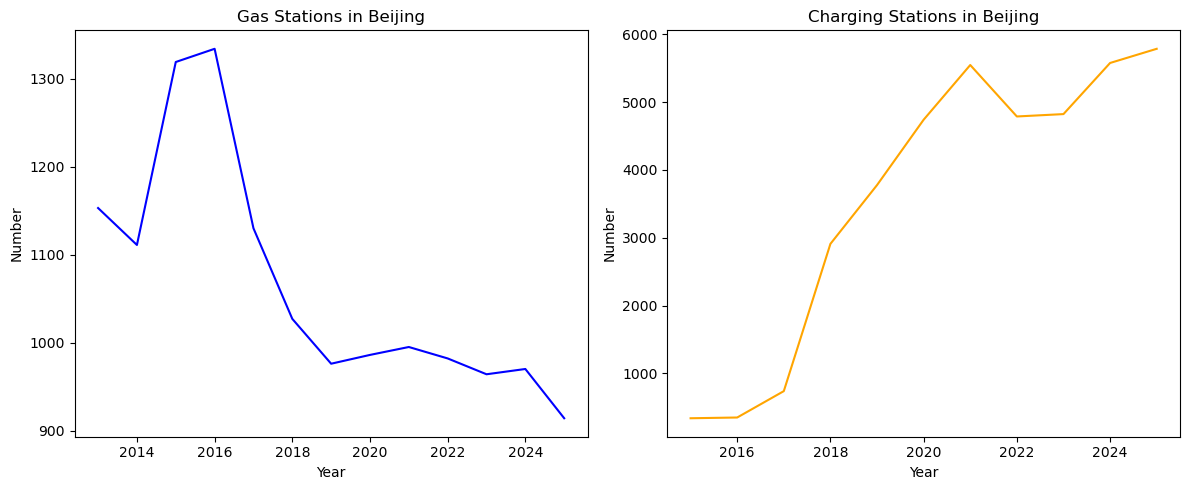

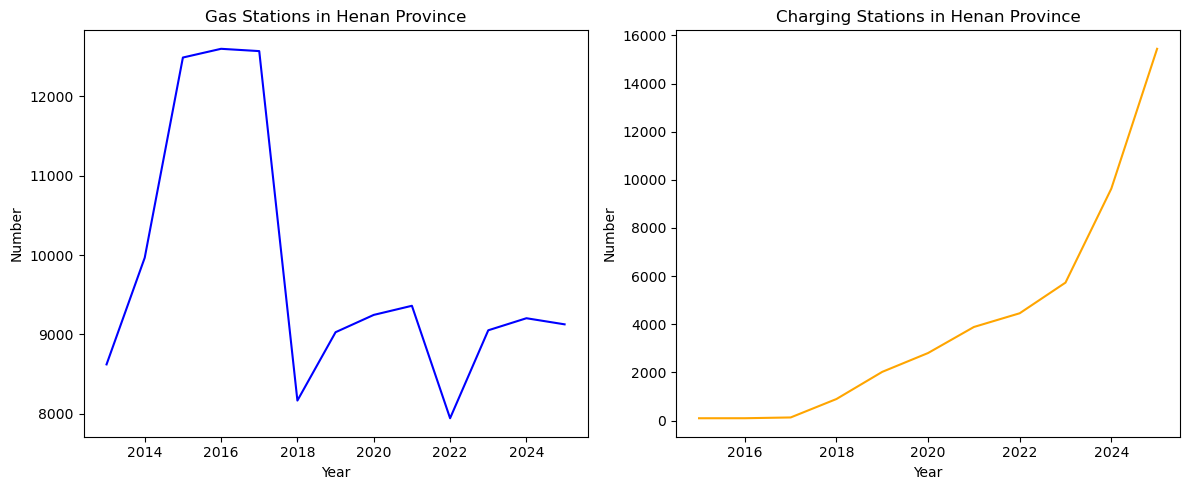

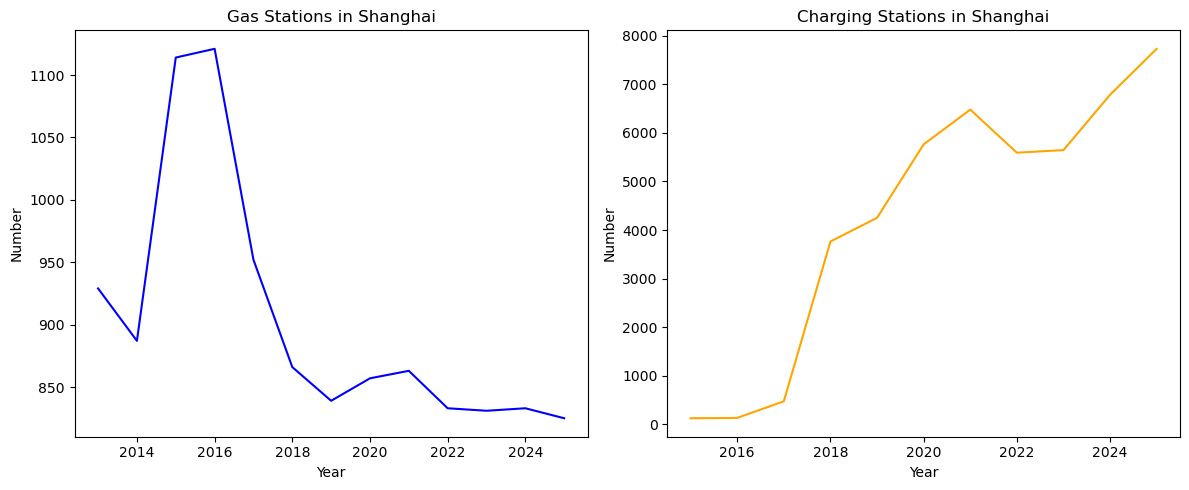

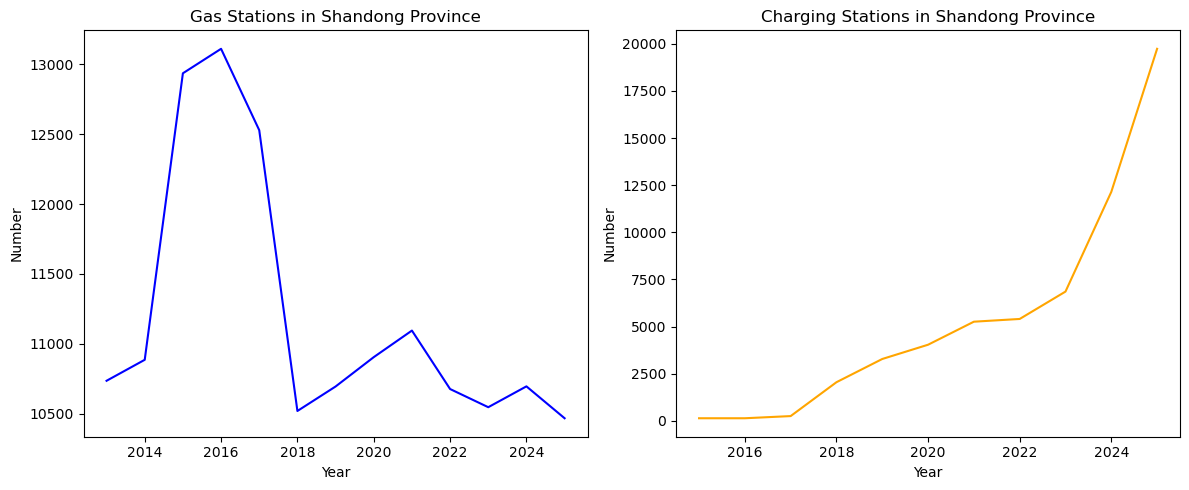

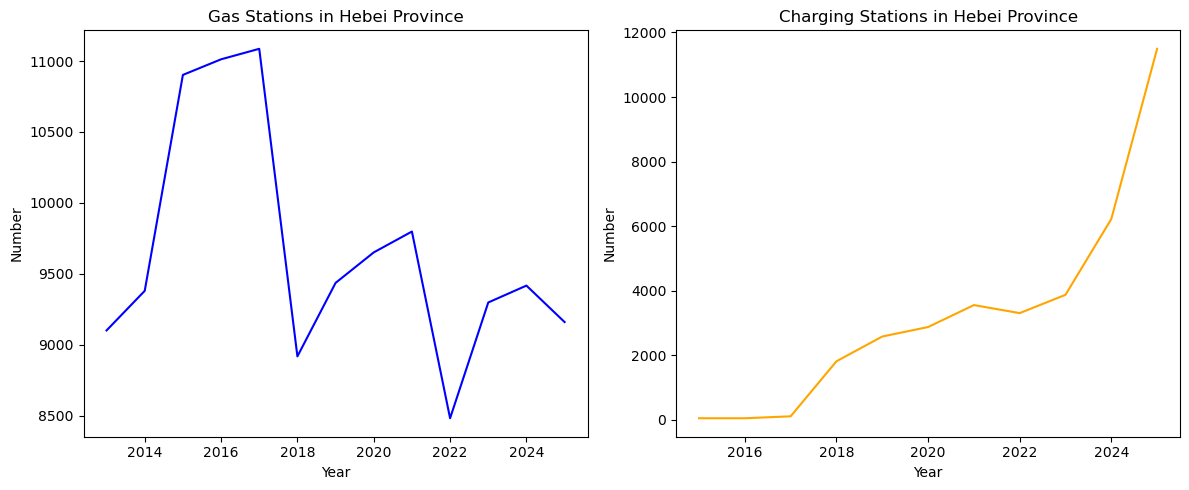

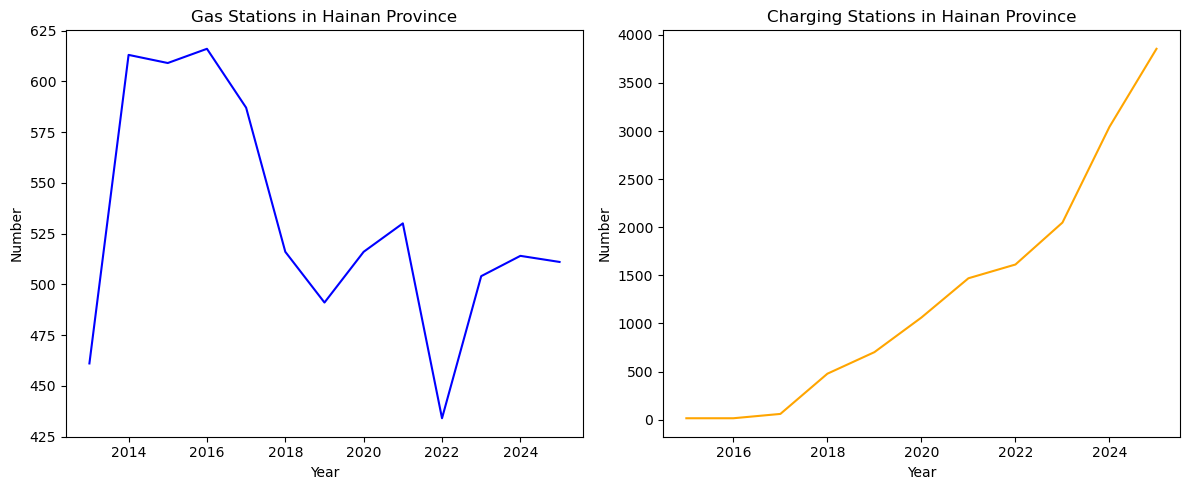

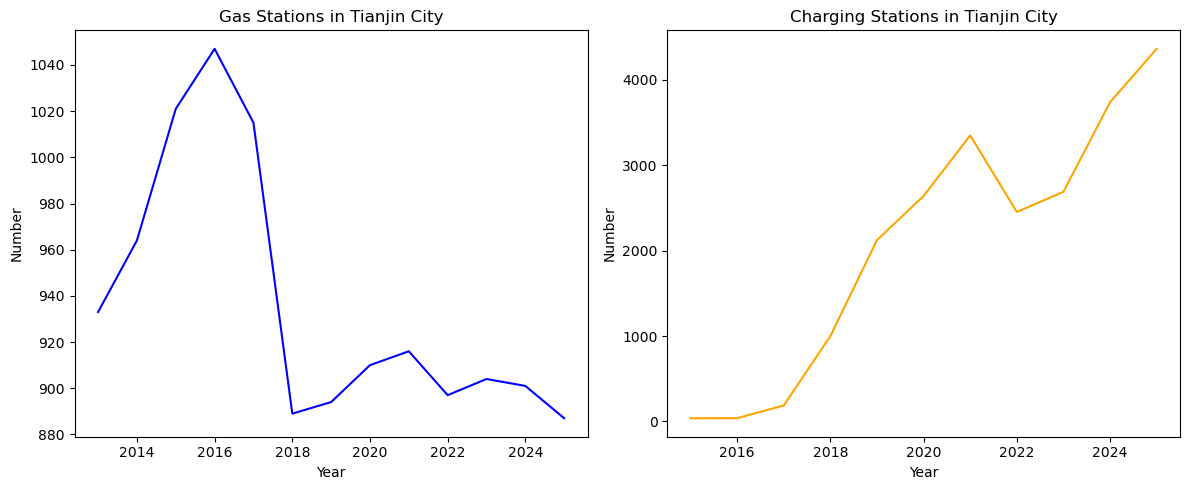

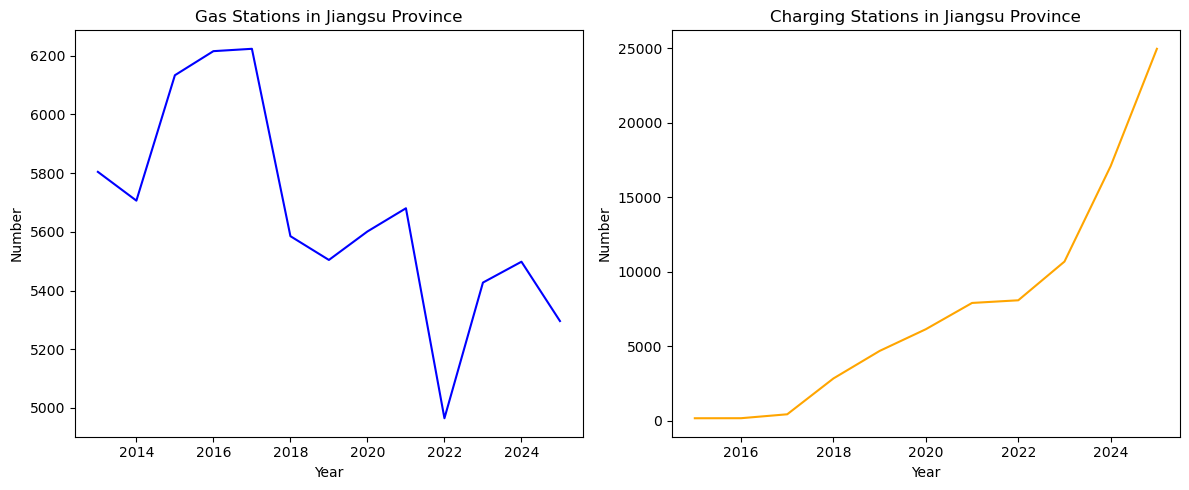

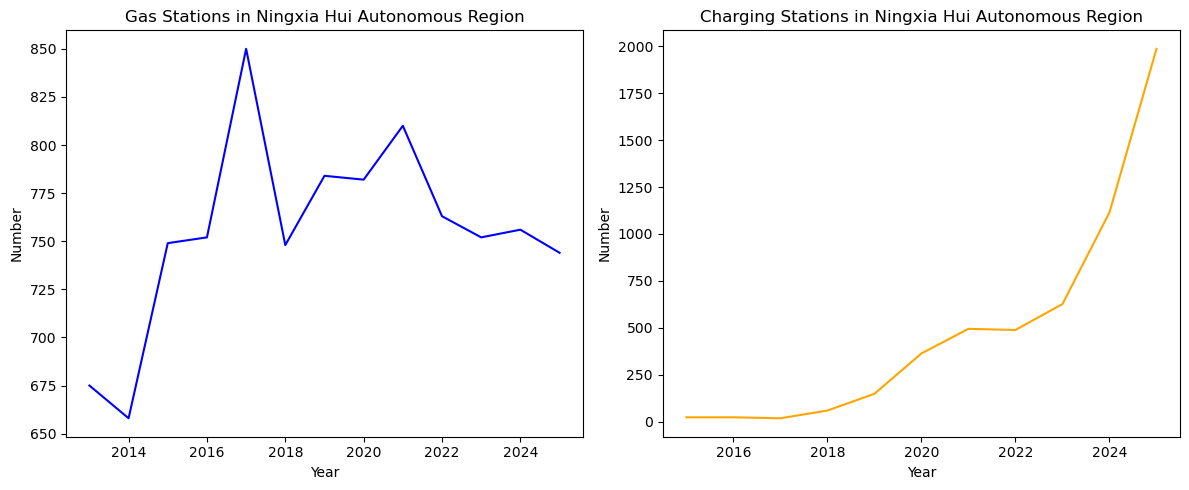

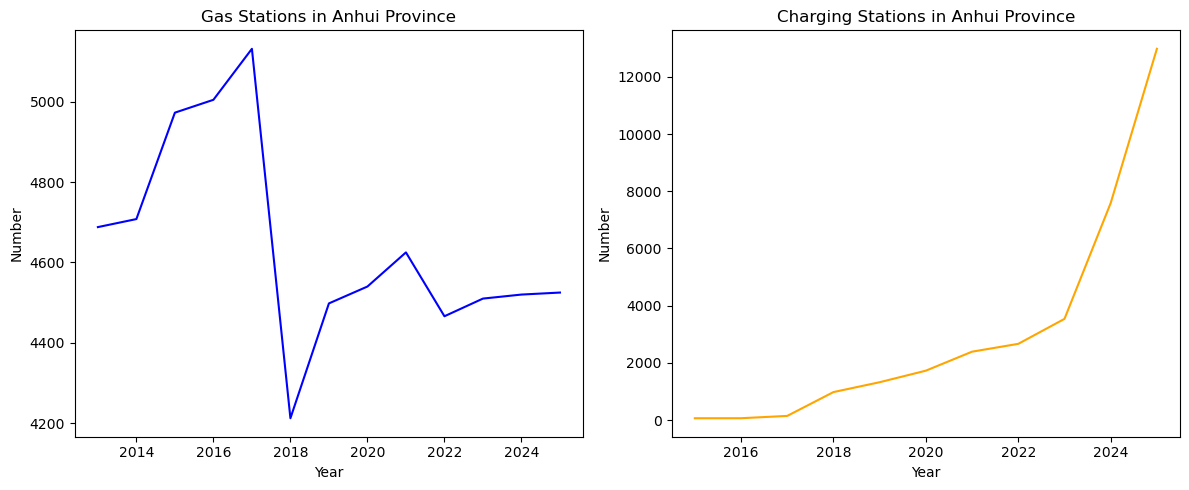

In [13]:
# 4. For provinces, plot GS and CS number changes for fastest growing and most declining provinces

# Fastest growing provinces
for pname, _ in top_provinces:
    gs_counts = [province_year_count[pname].get(y, 0) for y in years_gs]
    cs_counts = []
    for y in years_cs:
        df_cs = CS_data_set[y]
        cs_counts.append((df_cs['pname_EN'] == pname).sum())
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(years_gs, gs_counts, color='blue')
    axes[0].set_title(f'Gas Stations in {pname}')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number')
    axes[1].plot(years_cs, cs_counts, color='orange')
    axes[1].set_title(f'Charging Stations in {pname}')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Number')
    plt.tight_layout()
    plt.show()

# Most declining provinces
for pname, _ in decline_provinces:
    gs_counts = [province_year_count[pname].get(y, 0) for y in years_gs]
    cs_counts = []
    for y in years_cs:
        df_cs = CS_data_set[y]
        cs_counts.append((df_cs['pname_EN'] == pname).sum())
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(years_gs, gs_counts, color='blue')
    axes[0].set_title(f'Gas Stations in {pname}')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number')
    axes[1].plot(years_cs, cs_counts, color='orange')
    axes[1].set_title(f'Charging Stations in {pname}')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Number')
    plt.tight_layout()
    plt.show()